## We have 3 datasets in the cell_data folder involving cell phone usage. We need to combine them to find out which cell phone models have the most average data usage per month

### 1) Merge the user\_device and user\_usage tables together

#### Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)

In [9]:
import pandas as pd

In [4]:
user_device = pd.read_csv('cell_data/user_device.csv')
user_usage = pd.read_csv('cell_data/user_usage.csv')

In [5]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [6]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [10]:
print(len(user_device.merge(user_usage, how='inner', on='use_id')))
user_device.merge(user_usage, how='inner', on='use_id').head()

159


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33


In [11]:
print(len(user_device.merge(user_usage, how='left', on='use_id')))
user_device.merge(user_usage, how='left', on='use_id').head()

272


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22782,26980,ios,10.2,"iPhone7,2",2,NaN,NaN,NaN
1,22783,29628,android,6.0,Nexus 5,3,NaN,NaN,NaN
2,22784,28473,android,5.1,SM-G903F,1,NaN,NaN,NaN
3,22785,15200,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
4,22786,28239,android,6.0,ONE E1003,1,NaN,NaN,NaN


In [12]:
print(len(user_device.merge(user_usage, how='right', on='use_id')))
user_device.merge(user_usage, how='right', on='use_id').head()

240


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921.0,android,4.3,GT-I9505,1.0,21.97,4.82,1557.33
1,22788,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
2,22789,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
3,22790,29592.0,android,5.1,D2303,1.0,94.46,35.17,519.12
4,22792,28217.0,android,5.1,SM-G361F,1.0,71.59,79.26,1557.33


### 2) We want to analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv) and each brand ('Retail Branding' column in android\_devices.csv). Merge the dataframes appropriately to make this analysis possible. (Note: the 'device' column in user_device.csv has the same information as 'Model' in android\_devices.csv) 

In [15]:
android_devices = pd.read_csv('cell_data/android_devices.csv')

In [16]:
android_devices.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [17]:
df = android_devices.merge(user_device.merge(user_usage, how='left', on='use_id'),
                           how='left',
                           left_on='Model',
                           right_on='device')

In [18]:
df.head()

,Retail Branding,Marketing Name,Device,Model,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,NaN,NaN,AD681H,Smartfren Andromax AD681H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,FJL21,FJL21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,T31,Panasonic T31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Q,OC1020A,OC1020A,OC1020A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
retail = df.loc[df['Retail Branding'].isna() == False, ['Retail Branding', 
                                                        'outgoing_mins_per_month',
                                                        'outgoing_sms_per_month',
                                                        'monthly_mb']]

In [28]:
retail.head()

,Retail Branding,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
4,3Q,NaN,NaN,NaN
5,7Eleven,NaN,NaN,NaN
6,A.O.I. ELECTRONICS FACTORY,NaN,NaN,NaN
7,AG Mobile,NaN,NaN,NaN
8,AG Mobile,NaN,NaN,NaN


In [29]:
marketing = df.loc[df['Marketing Name'].isna() == False, ['Marketing Name', 
                                                        'outgoing_mins_per_month',
                                                        'outgoing_sms_per_month',
                                                        'monthly_mb']]

In [26]:
marketing.head()

,Retail Branding,Marketing Name,Device,Model,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
4,3Q,OC1020A,OC1020A,OC1020A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7Eleven,IN265,IN265,IN265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AG Mobile,AG BOOST 2,BOOST2,E4010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AG Mobile,AG Flair,AG_Flair,Flair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
retail_df = retail.groupby("Retail Branding").sum().sort_values(by='monthly_mb', ascending=False)

In [35]:
marketing_df = marketing.groupby("Marketing Name").sum().sort_values(by='outgoing_mins_per_month', ascending=False)

### 3) Create 2 dataframes showing the following:

#### Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by monthly_mb.

##### Plot the monthly_mb information by brand

In [39]:
%matplotlib inline

C:\Users\natha\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


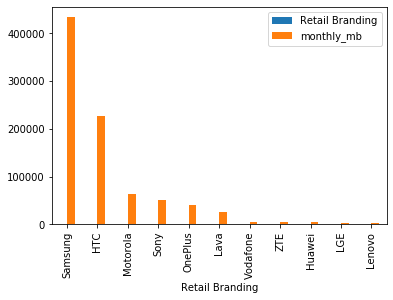

In [40]:
retail_df.loc[retail_df["monthly_mb"] > 0 ,["Retail Branding", "monthly_mb"]].plot.bar()

#### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by outgoing\_sms\_per\_month

##### Plot the outgoing\_sms\_per_month by phone model

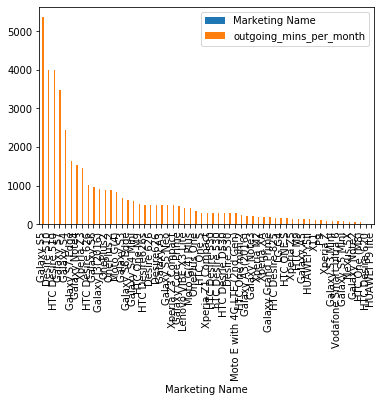

In [44]:
marketing_df.loc[marketing_df["outgoing_mins_per_month"] > 0, ["Marketing Name", "outgoing_mins_per_month"]].plot.bar()

# SQL Joins

### Import packages 
sqlite3
pandas
   
### Connect to databases cats.db, dogs.db and owners.db using sqlite3 (use for example conn = sqlite3.connect('cats.db') and then c = conn.cursor())

Let's try and work through some exercises to recap and retain the foundational knowledge of the language that our beloved databases use.

In the suburbs of Capitol Hill, there is a new pet daycare starting up that distributes pets among 4 houses.
Down below we have tables representing cats and dogs in the particular houses, and corresponding owners. 

Cats Table:

Name  			 | Breed 			| House_Number| Owner_ID|       
------------- | ------------- | ------------|---------
Bell  			| Siamese			|		1	    | 4
Jackson  		| Balinese 		|       2     |3
Precious  	| Himalayan  		|         3    | 4
Rocky			| Egyptian Mau 	| 4 		    | 2
Samson			| Javanese		|	4		| 1

Dogs Table:

Name  			 | Breed 	| House_Number	|Owner_ID|
-------------| ------------- | ------------|-----   
Rex  			| Chihuahua  		|		1	    |3
Clifford  	| German Shepherd|     2        |2
Lucky  		| Daschund  		|     3        |1
Bobo			| Shih-Tzu		|    2		   | 4
Buddy			| Golden Retriever | 4		   | 2
Leo				| English Bulldog | 1 | 2

Owners Table:

Name  		| Phone	| Address	|ID| 
-------------| ------------- | ------------|-----
Josh Daniell  | 313-287-9573  |1440 G St. |1
Alison Peebles Madigan| 214-709-8190| None |2
Avi Flombaum	| 469-878-0125  |  1776 New York Ave| 3
Justin Bieber | 410-381-0987 | None | 4


Write the appropriate SQL queries to satisfy the following prompts:

A. Write a SQL query that can grab the names of all pets owned by the founder of Flatiron School, Avi Flombaum

B. Which House_Number contains the most number of pets in it and how many?

C. The daycare realized that House 4 needs the owners of its pets to update their addresses. Grab the names and phone numbers of owners with pets in house 4 that do not currently have an address.


In [1]:
import sqlite3

In [6]:
conn_cat = sqlite3.connect('cats.db')
cats = conn_cat.cursor()
conn_dog = sqlite3.connect('dogs.db')
dogs = conn_dog.cursor()
conn_own = sqlite3.connect('owners.db')
own = conn_own.cursor()

In [7]:
own.execute("""ATTACH DATABASE "cats.db" AS cats""")
own.execute("""ATTACH DATABASE "dogs.db" AS dogs""")

In [16]:
own.execute("""ALTER TABLE cats
               ADD Type TEXT
""")

OperationalError: duplicate column name: Type

In [17]:
own.execute("""ALTER TABLE dogs
               ADD Type TEXT
""")

OperationalError: duplicate column name: Type

In [18]:
own.execute("""UPDATE cats
               SET Type = "Cat"
""")

In [19]:
own.execute("""UPDATE dogs
               SET Type = "Dog"
""")

In [20]:
own.execute("""DELETE FROM cats
               WHERE House_Number < 1
""")

In [21]:
own.execute("""SELECT animals.Name AS animal_name, owners.Name as owner_name
               FROM owners
               JOIN (SELECT * FROM cats
                     UNION
                     SELECT * FROM dogs) AS animals
               ON owners.ID = animals.Owner_ID
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,animal_name,owner_name
0,Lucky,Josh Daniell
1,Samson,Josh Daniell
2,Buddy,Alison Peebles Madigan
3,Clifford,Alison Peebles Madigan
4,Leo,Alison Peebles Madigan
5,Rocky,Alison Peebles Madigan
6,Jackson,Avi Flombaum
7,Rex,Avi Flombaum
8,Bell,Justin Bieber
9,Bobo,Justin Bieber


In [22]:
own.execute("""SELECT animals.Name AS animal_name, owners.Name as owner_name
               FROM owners
               JOIN (SELECT * FROM cats
                     UNION
                     SELECT * FROM dogs) AS animals
               ON owners.ID = animals.Owner_ID
               WHERE owners.Name = "Avi Flombaum"
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,animal_name,owner_name
0,Jackson,Avi Flombaum
1,Rex,Avi Flombaum


In [23]:
own.execute("""SELECT *
               FROM cats
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,Name,Breed,House_Number,Owner_ID,Type
0,Bell,Siamese,1,4,Cat
1,Jackson,Balinese,2,3,Cat
2,Precious,Himalayan,3,4,Cat
3,Rocky,Egyptian Mau,4,2,Cat
4,Samson,Javanese,5,1,Cat


In [24]:
own.execute("""SELECT *
               FROM dogs
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,Name,Breed,House_Number,Owner_ID,Type
0,Rex,Chihuahua,1,3,Dog
1,Clifford,German Shepherd,2,2,Dog
2,Lucky,Daschund,3,1,Dog
3,Bobo,Shih-Tzu,2,4,Dog
4,Buddy,Golden Retriever,4,2,Dog
5,Leo,English Bulldog,1,2,Dog


In [25]:
own.execute("""SELECT House_Number, COUNT(*) as Pet_Quantity
               FROM (SELECT * FROM cats
                     UNION
                     SELECT * FROM dogs) AS animals
               GROUP BY House_Number
               ORDER BY COUNT(*) DESC
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,House_Number,Pet_Quantity
0,1,3
1,2,3
2,3,2
3,4,2
4,5,1


C. The daycare realized that House 4 needs the owners of its pets to update their addresses. Grab the names and phone numbers of owners with pets in house 4 that do not currently have an address.

In [26]:
own.execute("""SELECT DISTINCT owners.Name as owner_name, Phone
               FROM owners
               JOIN (SELECT * FROM cats
                     UNION
                     SELECT * FROM dogs) AS animals
               ON owners.ID = animals.Owner_ID
               WHERE House_Number = 4 AND Address = "None"
""")
df = pd.DataFrame(own.fetchall())
df.columns = [x[0] for x in own.description]
df

,owner_name,Phone
0,Alison Peebles Madigan,2147098190
